In [1]:
# Don't change this cell; just run it.
import numpy as np
import pandas as pd
from IPython.display import display, Markdown

# Safe settings for Pandas.
pd.set_option('mode.chained_assignment', 'raise')
%matplotlib inline
import matplotlib.pyplot as plt

# Make the plots look more fancy.
plt.style.use('fivethirtyeight')

# Confidence Intervals

- We will look at confidence intervals via a modern code-based method of generating confidence intervals, called the bootsrap

- (I hope you'll agree!) this approach promotes a deep understanding of the meaning of confidence intervals 

- The information the confidence intervals convey is the same as that conveyed by confidence intervals generated by "traditional" methods (e.g. those derived from formulas you have no doubt seen in statistics textbooks)

*Note*: This page has content from the [Bootstrap](https://github.com/data-8/textbook/blob/64b20f0/notebooks/Bootstrap.ipynb)
notebook of an older version of the [UC Berkeley data science course](https://inferentialthinking.com/). See the Berkeley course section of the [license file](https://uob-ds.github.io/cfd2021/license).

# A data scientist's predicament

Consider this scenario: a data scientist has been asked to help with a research project in the field of historical epidemiology - analysing historical datasets related to health. 

Her task is to estimate the birthweights of babies born at a small hospital in Oakland, CA in the year 1960. She is to do this in order to later test the hypothesis that babies born at this hospital in this year were underweight, relative to the national average at that time.

However, the data scientist is in a predicament.  Initially, she was granted access to a random sample of 25 baby records whilst waiting for clearance from the hospital's medical records department to access the complete dataset. The complete dataset includes the birthweights for all 1236 babies born at that hospital in 1960.

*NB*: "random" here means that each baby's record had an equal chance of making it into the sample, it was not biased towards specific babies being in the sample.

But disaster has struck, and the hospital's medical records department has lost the full dataset in the meantime. (Research rarely goes to plan!).

At the moment, she only has her random sample of 25 babies, which is shown the output of the code cell below:

In [2]:
# load in the data (this is real data!)
babies_sample = pd.read_csv('babies_sample.csv')

# show the data
babies_sample

,birthweight_kg
0,3.260195
1,3.316894
2,2.806602
3,3.401942
4,3.033399
5,3.118447
6,3.373593
7,3.685438
8,3.628739
9,3.855535


Our data scientist is interested in the average birthweight, so she calculates this from her sample:

In [3]:
# calculate the sample mean
sample_mean = babies_sample['birthweight_kg'].mean()

# show the sample mean
sample_mean

3.4121482272

She also plots the sample birthweights, to see how they are distributed:

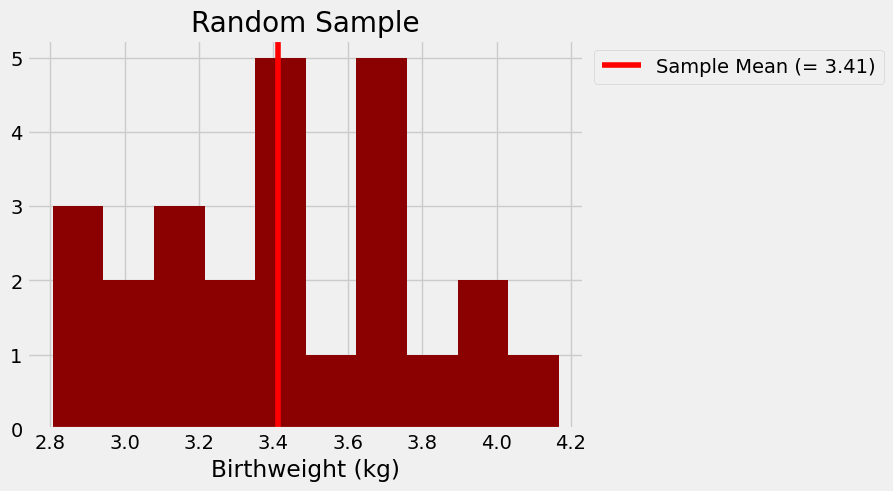

In [4]:
# plot the sample, and its mean
plt.hist(babies_sample['birthweight_kg'], color = 'darkred')
plt.axvline(sample_mean, color = 'red', label = f"Sample Mean (= {round(sample_mean, 2)})")
plt.xlabel('Birthweight (kg)')
plt.title('Random Sample')
plt.legend(bbox_to_anchor = (1,1));

So at the moment - because the hospital has lost the full dataset - our data scientist is stuck with a random sample of 25 birthweights. But she doesn't care *specifically* about this random sample of 50 babies...she cares about the *population* of all 1236 babies born in 1960 at this particular hospital. 

"Population" here is being used in the technical statistical sense - it refers to all of the 'observational units' (in this case babies) which are of interest for a particular research question. In this case the population she is interested in is *all* of the 1236 babies born at the hospital in 1960.

A sample is a small subset of a populaton. A random sample is sample where each observation in the sample had an equal probability of being selected (e.g. there was no bias towards particular observations making it into the sample).

What if her sample of 25 babies is unrepresenative of all 1236 babies born in 1960?

The data scientist faces what I will call *The Fundamental Problem of Data Science*:

> We care about populations, but all we (usually!) have access to are samples.

Our data scientist could just take the average birthweight of her sample, and report to the rest of her research team that this is probably what the population birthweight was, and then go on her merry way. 

But she’s a data scientist. She knows that her random sample is just one of numerous possible random samples. On a different day, different records would have made it into her random sample, and the sample would have had a different average birthweight, and therefore her estimate of what the population birthweight is would have been different...

# An all-knowing perspective

[Set it as WE know the popuation value, but out data scientist doesn't]

[So WE are in the luxury situation of just being able to look at the parameter]

In [5]:
babies_pop = pd.read_csv('babies.csv')

babies_pop

,birthweight_kg
0,3.401942
1,3.203496
2,3.628739
3,3.486991
4,3.061748
...,...
1231,3.203496
1232,3.628739
1233,3.685438
1234,3.543690


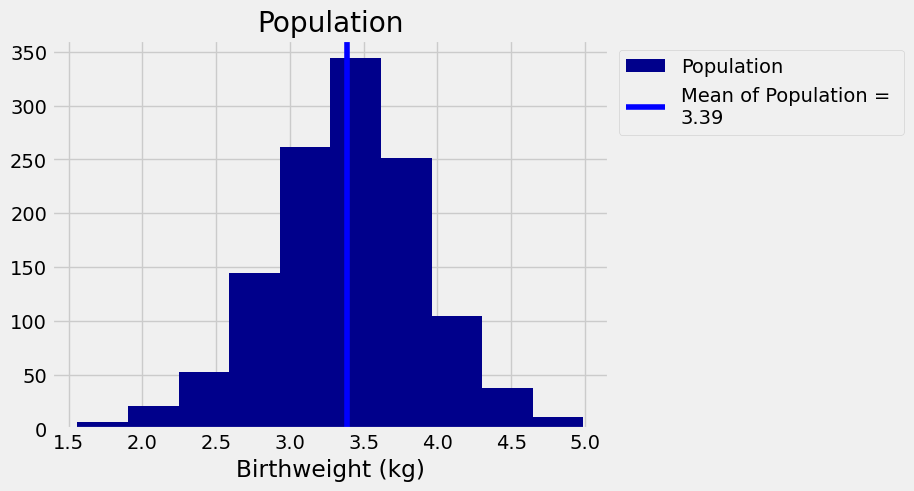

In [6]:
# plot a histogram, show the pop and pop mean
plt.hist(babies_pop["birthweight_kg"], color = 'darkblue', 
         label = 'Population')
plt.axvline(babies_pop["birthweight_kg"].mean(), 
            label = f'Mean of Population = \n{babies_pop["birthweight_kg"].mean().round(2)}', 
            color = "blue")
# add axis labels and legend
plt.xlabel('Birthweight (kg)')
plt.legend(bbox_to_anchor = (1,1))
plt.title('Population');

In [7]:
# store the population mean as a variable
population_mean = babies_pop["birthweight_kg"].mean().round(2)

population_mean

3.39

In [8]:
# draw a new sample
new_sample = babies_pop.sample(25)

# show the new sample and the mean
display(Markdown(f"\nNew sample mean = {np.mean(new_sample).round(2)}"))
display(new_sample.round(2))


New sample mean = 3.45

,birthweight_kg
208,3.71
426,3.97
47,3.12
15,3.26
1004,3.46
29,3.23
959,4.17
851,3.80
927,2.18
225,3.32


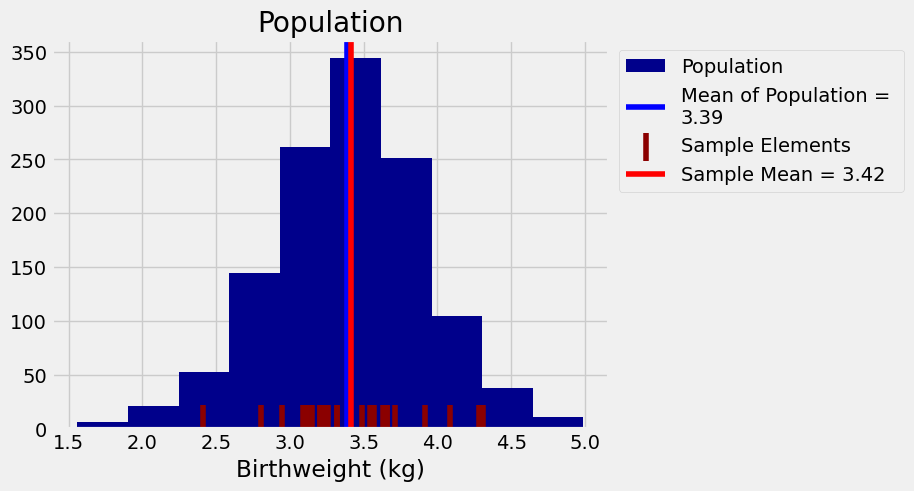

In [9]:
# draw a new random sample
sample = babies_pop["birthweight_kg"].sample(25)

# plot a histogram, show the pop and pop mean
plt.hist(babies_pop["birthweight_kg"], color = 'darkblue', 
         label = 'Population')
plt.axvline(babies_pop["birthweight_kg"].mean(), 
            label = f'Mean of Population = \n{population_mean}', 
            color = "blue")

# show the new sample and new sample mean
plt.scatter(sample, np.repeat(9, len(sample)), 
            marker = "|", s = 400, 
            color = 'darkred',
            label = 'Sample Elements')
plt.axvline(sample.mean(), color = "red",
            label = f'Sample Mean = {sample.mean().round(2)}')
    
# add axis labels and legend
plt.xlabel('Birthweight (kg)')
plt.legend(bbox_to_anchor = (1,1))
plt.title('Population');

Our data scientist understands this principle.

She knows her sample is just one of many possible samples, and that the average birthweight in her sample is just one of many average birthweights that she could have ended up with.

We have just seen, that as you draw repeated random samples, sometimes the sample average is very close to the population average. Sometimes it is quite far from the population average.

So when our data scientist is wondering whether her sample average is a good representation of the population average, she knows that the answer is "the population average is probably somewhere near my sample average, it'll be the sample average **plus or minus a bit**".

This "plus or minus a bit" means her sample average is an *uncertain* estimate of the population average.

But how uncertain? How does she know how big "plus or minus a bit" might be? Our data scientist is not in the luxury, all knowing perspective we are currently in. We can simply draw new random samples to see how much, on average, their means vary.

Our data scientist cannot simply draw new random samples from the population - because she doesn't have access to the full dataset. 

She is stuck with the sample she has. So how can she work out how big "plus or minus a bit" might be?

# The Bootstrap

In the present situation - with access to an entire population's worth of data! - to see how different the estimate would be if the sample had come out differently, we can just draw another sample from the population, *but this
is cheating*. In real life typically we won't have all the population data at hand.

We will be stuck with one sample, trying to make inferences about an underlying population parameter.

Somehow, we have to get another random sample without sampling from the
population.

Fortunately, a brilliant idea called the bootstrap can help out here. The bootstrap let's us simulate drawing new random samples by a method called *resampling*: the new samples are drawn at random *from the original sample*.

*This may seem like a sleight of hand, but hopefully I can convince you it works!*

We will now see how and why the bootstrap works. 

## The Bootstrap: Resampling from the Sample

What we do have is a large random sample from the population. As we know, a
large random sample is likely to resemble the population from which it is
drawn. This observation allows data scientists to *lift themselves up by their
own bootstraps*: the sampling procedure can be replicated by *sampling from the
sample*.

Here are the steps of *the bootstrap method* for generating another random
sample that resembles the population:

- **Treat the original sample as if it were the population.**
- **Draw from the sample**, at random **with** replacement, **a sample which is the same size as the original sample size**.

It is important to resample the same number of times as the original sample
size. The reason is that the variability of an estimate depends on the size of
the sample. Since our original sample consisted of 500 employees, our sample
mean was based on 500 values. To see how different the sample could have
been, we have to compare it to the mean of other samples of size 500.

#### Why do we resample WITH replacement?

If we drew 500 times at random *without* replacement from our sample of size
500, we would just get the same sample back. By drawing *with* replacement, we
create the possibility for the new samples to be different from the original,
because some employees might be drawn more than once and others not at all.

Why is this a good idea? By the law of averages, the distribution of the
original sample is likely to resemble the population, and the distributions of
all the "resamples" are likely to resemble the original sample. So the
distributions of all the resamples are likely to resemble the population as
well.

![](bootstrap_pic.png)

## A Resampled mean

Our `compensation` values are stored in a pandas Series. We will use the `sample` method of a pandas Series to take the new sample with replacement.

We want a sample the same size as the original sample (500), where we are
sampling *with replacement*.

Here is one new sample drawn from the original sample, with replacement, and
the corresponding sample mean.

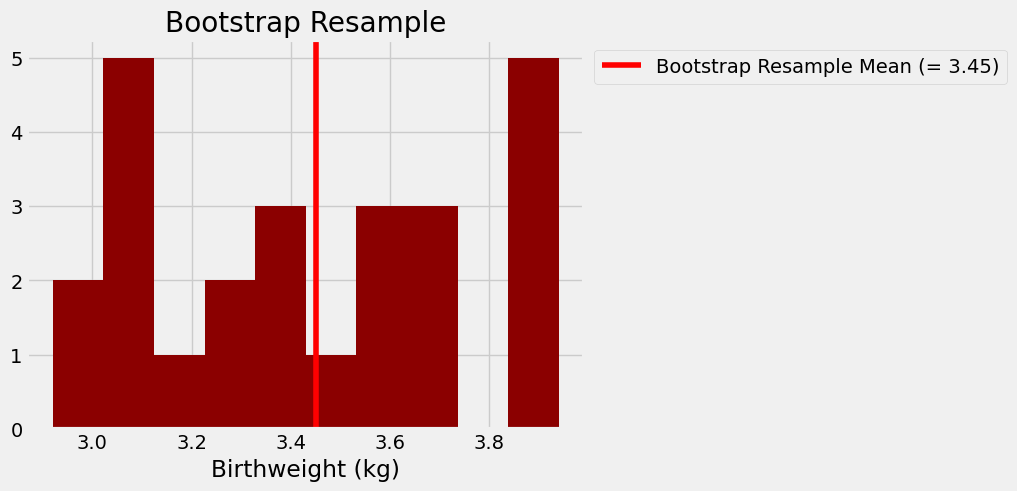

In [10]:
# draw a sample of size 25 from our original sample, with replacement.
bootstrap_resample = babies_sample['birthweight_kg'].sample(25, replace= True)

# plot a histogram of the sample
plt.hist(bootstrap_resample, color = 'darkred')
plt.axvline(bootstrap_resample.mean().round(2),
            color = 'red',
            label = f"Bootstrap Resample Mean (= {bootstrap_resample.mean().round(2)})")
plt.xlabel('Birthweight (kg)')
plt.title('Bootstrap Resample')
plt.legend(bbox_to_anchor = (1,1));

By resampling, we have something like another estimate of the population
mean. By resampling again and again, we will get many such estimates, and
hence an empirical distribution of the estimates.  We can call this
distribution a *sampling distribution* of the mean - it is the distribution
of the mean values we get from taking many samples.  Our samples are
*bootstrap* samples, so this is the *bootstrap sampling distribution of the
mean*.

## Bootstrap Empirical Distribution of the Sample mean

Let us define a function `bootstrap_mean` that takes our original sample,
and the number of bootstrap samples we want to take, and returns an array of
the corresponding resampled means.

Each time we resample and find the mean, we *replicate* the bootstrap
process. So the number of bootstrap samples will be called the number of
replications.

In [11]:
def bootstrap_mean(original_sample, replications):
    """Return array of bootstrapped sample means

    Parameters
    ----------
    original_sample: Series
        Series containing the original sample
    replications: number
        number of bootstrap samples

    Returns
    -------
    samp_meds : array
        Array of bootstrapped sample means.
    """
    # calculate the length of the original sample
    n = len(original_sample)
    
    # create an empty array to store the estimate of the means
    # over repeated resamples
    means = np.zeros(replications)

    # repeat the resampling procedure, and store the estimate of
    # the mean each time
    for i in np.arange(replications):
        bootstrap_sample = original_sample.sample(n, replace=True)
        means[i] = np.mean(bootstrap_sample)
        
    # return the array of estimate means
    return means

We now replicate the bootstrap process 5,000 times. The array `bstrap_means`
contains the means of all 5,000 bootstrap samples. Notice that the code
takes longer to run than our previous code. It has a lot of resampling to do!

In [12]:
# run our function, to generate an array containing the bootstrapped means
bstrap_means = bootstrap_mean(babies_sample['birthweight_kg'], 5000)

# show the array
bstrap_means

array([3.57770942, 3.37359288, 3.44049775, ..., 3.50967058, 3.45297154,
       3.38379871])

In [13]:
len(bstrap_means)

5000

Here is the histogram of the 5000 means. The blue line is the population
parameter: it is the mean of the entire population, which we happen to know
but did not use in the bootstrap process.

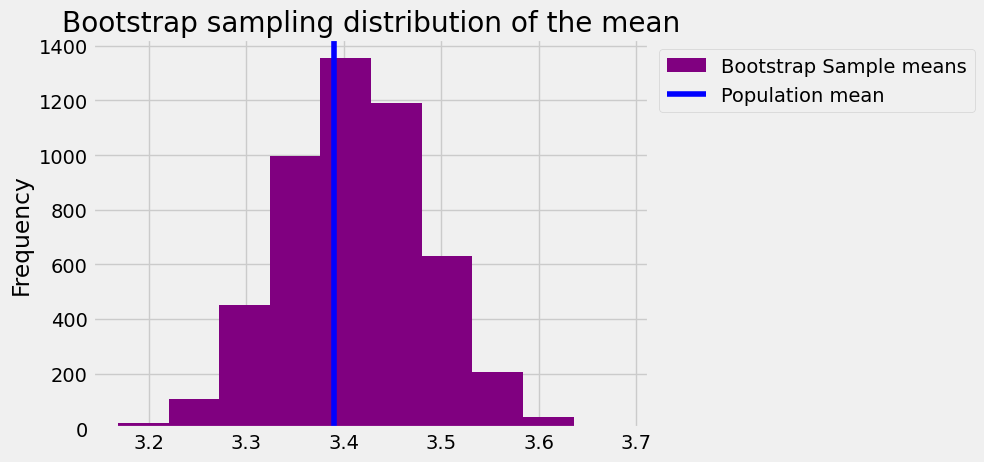

In [14]:
# a new dataframe for the means, obtained via resampling
resampled_means = pd.DataFrame()
resampled_means['Bootstrap Sample means'] = bstrap_means

# plot the distribution of bootstrapped means
resampled_means.plot.hist(color = 'purple')

# show the population mean
plt.axvline(population_mean,  color='blue', label = 'Population mean')

# add title and labels to the plot
plt.title('Bootstrap sampling distribution of the mean')
plt.legend(bbox_to_anchor = (1, 1));

It is important to remember that the blue line is fixed: it is \\\$110,305.79, the
population mean. The empirical histogram is the result of random draws, and
will be situated randomly relative to the blue line.

Remember also that the point of all these computations is to estimate the
population mean, which is the blue line. Our estimates are all the randomly
generated sampled means whose histogram you see above. We want those
estimates to contain the parameter – it they don't, then they are off.


## Do the Estimates Capture the Parameter?

How often does the empirical histogram of the resampled means sit firmly over
the blue line, and not just brush the linewith its tails? To answer this, we must
define "sit firmly". Let's take that to mean "the middle 95% of the resampled
means contains the blue line".

Here are the two ends of the "middle 95%" interval of resampled means:

We can use unpacking in the usual way, to set our `left` and `right` variables:

In [15]:
left, right = np.percentile(bstrap_means, [2.5, 97.5])
print('Left:', left)
print('Right:', right)

Left: 3.2726685888
Right: 3.5561637888


The population mean of \$110,305 is between these two numbers, `left` and
`right`. We show the interval and the population mean on the histogram below.

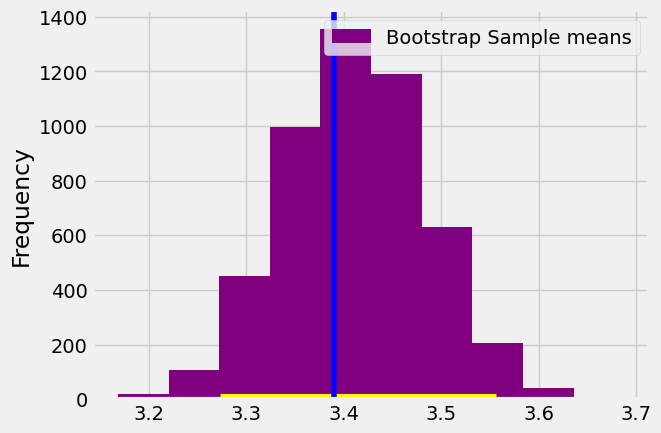

In [16]:
resampled_means.plot.hist(color = 'purple')
plt.axvline(population_mean,  color='blue', label = 'Population mean')
plt.plot([left, right], [0, 0], color='yellow', lw=8, zorder=1,
         label = "Interval containing 95% of the\nbootstrapped means");

The "middle 95%" interval of estimates captured the parameter in our example.
But was that a fluke?

To see how frequently the interval contains the parameter, we have to run the
entire process over and over again. Specifically, we will repeat the following
process 100 times:

* Draw an original sample of size 500 from the population.
* Carry out 5,000 replications of the bootstrap process and generate the
  "middle 95%" interval of resampled means.

As usual we start by doing one trial, where we take one sample, and generate
one left and one right interval.  This is the code we have been using above.

We can run this cell manually many times, below will we automate this process:

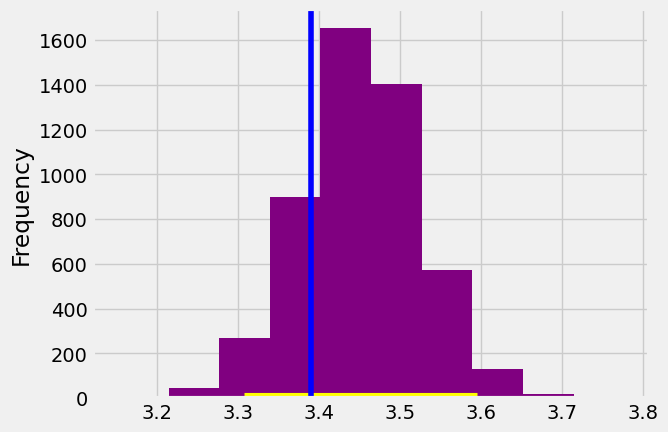

Left 3.3066880128000005
Left 3.5947191360000006


In [17]:
# One trial, generating a left and right interval.
# Take a new sample.
this_sample = babies_sample['birthweight_kg'].sample(25, replace=True)

# Get the bootstrap sampling distribution of the mean.
these_means = pd.Series(bootstrap_mean(this_sample, 5000))

these_means.plot.hist(color = 'purple', label = "Boostrap Sample means")
plt.axvline(population_mean,  color='blue', label = 'Population mean')

# Calculate the left, right ends, and plot them.
left_end, right_end = np.percentile(these_means, [2.5, 97.5])
plt.plot([left_end, right_end], [0, 0], color='yellow', lw=8, zorder=1,
         label = "Interval containing 95% of the\nbootstrapped means")

# add plot labels
plt.show()

# show the left and right end values
print('Left', left_end)
print('Left', right_end)

We will repeat this trial procedure 20 times, to give with 20 left and right
intervals, and count how many of these intervals contain the population mean.

**Spoiler alert:** The statistical theory of the bootstrap says that the number
should be around 95. It may be in the low 90s or high 90s, but not much farther
off 95 than that.

In [18]:
# THE BIG SIMULATION: This one can take several minutes.

# Set up to make 20 left and right intervals
n_intervals = 20
left_ends = np.zeros(n_intervals)
right_ends = np.zeros(n_intervals)

for i in np.arange(n_intervals):
    
    # One trial, generating a left and right interval.
    # Take a new sample.
    this_sample = babies_sample['birthweight_kg'].sample(25, replace=True)
    
    # Get the bootstrap sampling distribution of the mean.
    these_means = bootstrap_mean(this_sample, 5000)
    
    # Calculate the left, right ends.
    left_end, right_end = np.percentile(these_means, [2.5, 97.5])
    
    # Store the results for this trial.
    left_ends[i] = left_end
    right_ends[i] = right_end

# Put interval ends into own data frame.
intervals = pd.DataFrame()
intervals['Left'] = left_ends
intervals['Right'] = right_ends

For each of the 20 replications, we get one (left, right) interval of
estimates of the mean.

In [19]:
intervals

,Left,Right
0,3.305554,3.586781
1,3.363387,3.645748
2,3.238649,3.446168
3,3.202362,3.510805
4,3.289678,3.617399
5,3.319133,3.600389
6,3.240917,3.517637
7,3.239783,3.475680
8,3.316894,3.675232
9,3.223879,3.492661


The good intervals are those that contain the parameter we are trying to
estimate. Typically the parameter is unknown, but in this section we happen to
know what the parameter is.

In [20]:
population_mean

3.39

How many of the 20 intervals contain the population mean? That's the number
of intervals where the left end is below the population mean and the right
end is above.

In [21]:
intervals["Contains Population mean"] = np.logical_and(left_ends < population_mean, right_ends > population_mean)
intervals

,Left,Right,Contains Population mean
0,3.305554,3.586781,True
1,3.363387,3.645748,True
2,3.238649,3.446168,True
3,3.202362,3.510805,True
4,3.289678,3.617399,True
5,3.319133,3.600389,True
6,3.240917,3.517637,True
7,3.239783,3.475680,True
8,3.316894,3.675232,True
9,3.223879,3.492661,True


It takes a few minutes to construct all the intervals, but try it again if you
have the patience. Most likely, about 95% intervals will be good
ones: they will contain the parameter.

It's hard to show you all the intervals on the horizontal axis as they have
large overlaps – after all, they are all trying to estimate the same parameter.
The graphic below shows each interval on the same axes by stacking them
vertically. The vertical axis is simply the number of the replication from
which the interval was generated.

The blue line is where the parameter is. Good intervals cover the parameter;
about 95% of intervals generated by this method will be "good intervals", typically.

If an interval doesn't cover the parameter, it's a dud. The duds are the ones
where you can see "daylight" around the blue line. There are very few of them –
about 5% of them will be duds, typically – but they do happen.

Any method based on sampling has the possibility of being off. The beauty of
methods based on random sampling is that we can quantify how often they are
likely to be off.

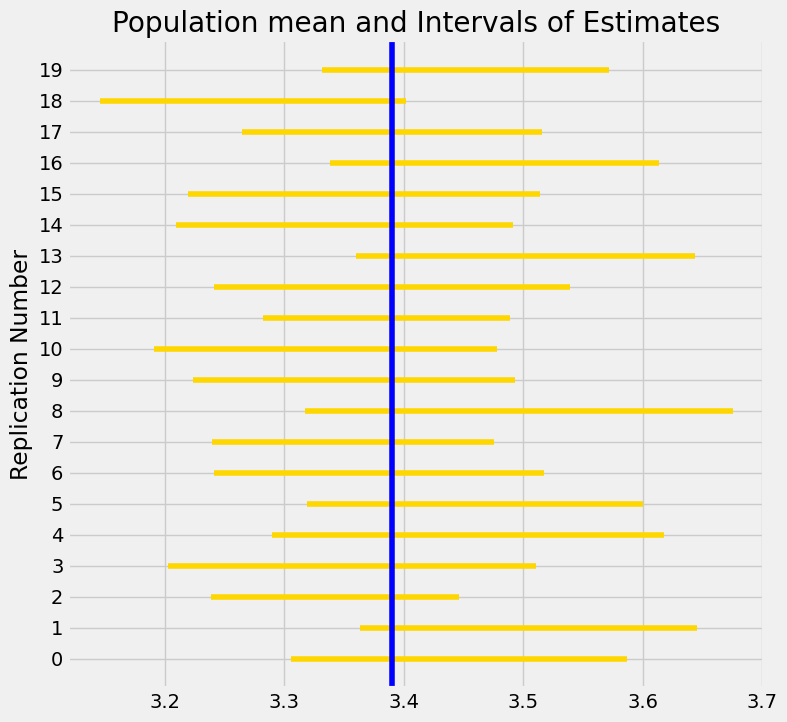

In [22]:
plt.figure(figsize=(8,8))
for i in np.arange(len(intervals)):
    ends = intervals[['Left', 'Right']].iloc[i]
    plt.plot(ends, [i, i], color='gold')
plt.axvline(population_mean,  color='blue', label = 'Population mean')
plt.plot([], [], color = 'gold',
         label = "Intervals containing 95% of the\nbootstrapped means for a given replication")
plt.ylabel('Replication Number')
plt.yticks(np.arange(n_intervals))
plt.title('Population mean and Intervals of Estimates');

To summarize what the simulation shows, suppose you are estimating the
population mean by the following process:

* Draw a large random sample from the population.
* Bootstrap your random sample and get an estimate from the new random sample.
* Repeat the above step thousands of times, and get thousands of estimates.
* Pick off the "middle 95%" interval of all the estimates.

That gives you one interval of estimates. Now if you repeat **the entire
process** 20 times, ending up with 20 intervals, then about 95% of those 20
intervals will contain the population parameter.

In other words, this process of estimation captures the parameter about 95% of
the time.

You can replace 95% by a different value, as long as it's not 100. Suppose you
replace 95% by 80% and keep the sample size fixed at 500. Then your intervals
of estimates will be shorter than those we simulated here, because the "middle
80%" is a smaller range than the "middle 95%". Only about 80% of your intervals
will contain the parameter.

*Note*: This page has content from the [Bootstrap](https://github.com/data-8/textbook/blob/64b20f0/notebooks/Bootstrap.ipynb)
notebook of an older version of the [UC Berkeley data science course](https://inferentialthinking.com/). See the Berkeley course section of the [license file](https://uob-ds.github.io/cfd2021/license).